In [24]:
# Configure plotting in Jupyter
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams.update({
    'figure.figsize': (20, 20),
    'axes.spines.right': False,
    'axes.spines.left': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False})
# Seed random number generator
from numpy import random as nprand
import random
seed = hash("Network Science in Python") % 2**32
nprand.seed(seed)
random.seed(seed)

In [25]:
# Create data directory path
from pathlib import Path
data_dir = Path('.') / 'data'


In [26]:
import networkx as nx

In [27]:
# Ignore articles, pronouns, etc.
stop_words = set([
    'the', 'of', 'and', 'i', 'to', 'my', 'in', 'was', 'that', 'thy',
    'a', 'had', 'my', 'with', 'but', 'he', 'she', 'you', 'your',
    'me', 'not', 'as', 'will', 'from', 'on', 'be', 'it', 'which',
    'for', 'his', 'him', 'chapter', 'at', 'who', 'by', 'have',
    'would', 'is', 'been', 'when', 'they', 'there', 'we', 'are',
    'our', 'if', 'her', 'were', 'than', 'this', 'what', 'so',
    'yet', 'more', 'their', 'them', 'or', 'could', 'an', 'can',
    'said', 'may', 'do', 'these', 'shall', 'how', 'shall', 'asked',
    'before', 'those', 'whom', 'am', 'even', 'its', 'did', 'then',
    'abbey', 'tintern', 'wordsworth', 'letter', 'thee', 'thou', 'oh',
    'into', 'any', 'myself', 'nor', 'himself', 'one', 'all', 'no', 'yes'
    'now', 'upon', 'only', 'might', 'every', 'own', 'such', 'towards',
    'again', 'most', 'ever', 'where', 'after', 'up', 'soon', 'many',
    'also', 'like', 'over', 'us', 'thus', 'has', 'about', 'o']
    + [str(x) for x in range(24)])

In [28]:
# This example uses regular expressions from the re package
import re
# Construct a network from a text
def co_occurrence_network(text):
    # Create a new network
    G = nx.Graph()
    # Split the text into sentences and iterate through them
    sentences = text.split('.')
    for s in sentences:
        # Remove punctuation and convert to lowercase + first remove [pg ] page numbers
        clean = re.sub('\[[^()]*\]', '', s).strip()
        clean = re.sub('[^\w\n ]+', '', clean).lower()
        clean = re.sub('_+', '', clean).strip()
        # Create list of words separated by whitespace
        words = re.split('\s+', clean)
        # Create an edge for each pair of words
        for v in words:
            # Update word count, add node if necessary
            try:
                G.nodes[v]['count'] += 1
            except KeyError:
                G.add_node(v)
                G.nodes[v]['count'] = 1
            # Update edge count for each pair of words in this sentence
            for w in words:
                # Skip stop words
                if v == w or v in stop_words or w in stop_words:
                    continue
                # Skip blank space
                if len(v) == 0 or len(w) == 0:
                    continue
                # Add one to the edge's count
                try:
                    G.edges[v, w]['count'] += 1
                except KeyError:
                    # Edge doesn't exist, create it
                    G.add_edge(v, w, count=1)
    return G

In [29]:
#i noticed there are page numbers in this format [pg 1] which need to be removed
# in the co_occurrence_ntwork() function above

In [30]:
# Read the text
with open(data_dir / 'ibrahim' / 'illiad.txt') as f:
    text = f.read()
# Create a network from the text
G = co_occurrence_network(text)

In [31]:
pairs = sorted(
    G.edges(data=True),
    key=lambda e: e[2]['count'],
    reverse=True)
pairs[0:1000]

[('achilles', 'great', {'count': 162}),
 ('jove', 'gods', {'count': 152}),
 ('oer', 'now', {'count': 150}),
 ('through', 'now', {'count': 150}),
 ('great', 'jove', {'count': 148}),
 ('great', 'hector', {'count': 148}),
 ('now', 'while', {'count': 144}),
 ('arms', 'now', {'count': 140}),
 ('great', 'now', {'count': 132}),
 ('now', 'plain', {'count': 128}),
 ('achilles', 'now', {'count': 124}),
 ('now', 'hector', {'count': 124}),
 ('war', 'arms', {'count': 122}),
 ('jove', 'above', {'count': 120}),
 ('oer', 'through', {'count': 120}),
 ('war', 'now', {'count': 116}),
 ('some', 'now', {'count': 116}),
 ('achilles', 'patroclus', {'count': 116}),
 ('high', 'oer', {'count': 116}),
 ('troy', 'now', {'count': 112}),
 ('son', 'great', {'count': 112}),
 ('jove', 'now', {'count': 110}),
 ('vain', 'plain', {'count': 110}),
 ('war', 'great', {'count': 108}),
 ('god', 'now', {'count': 108}),
 ('troy', 'hector', {'count': 106}),
 ('god', 'arms', {'count': 106}),
 ('son', 'arms', {'count': 106}),
 ('s

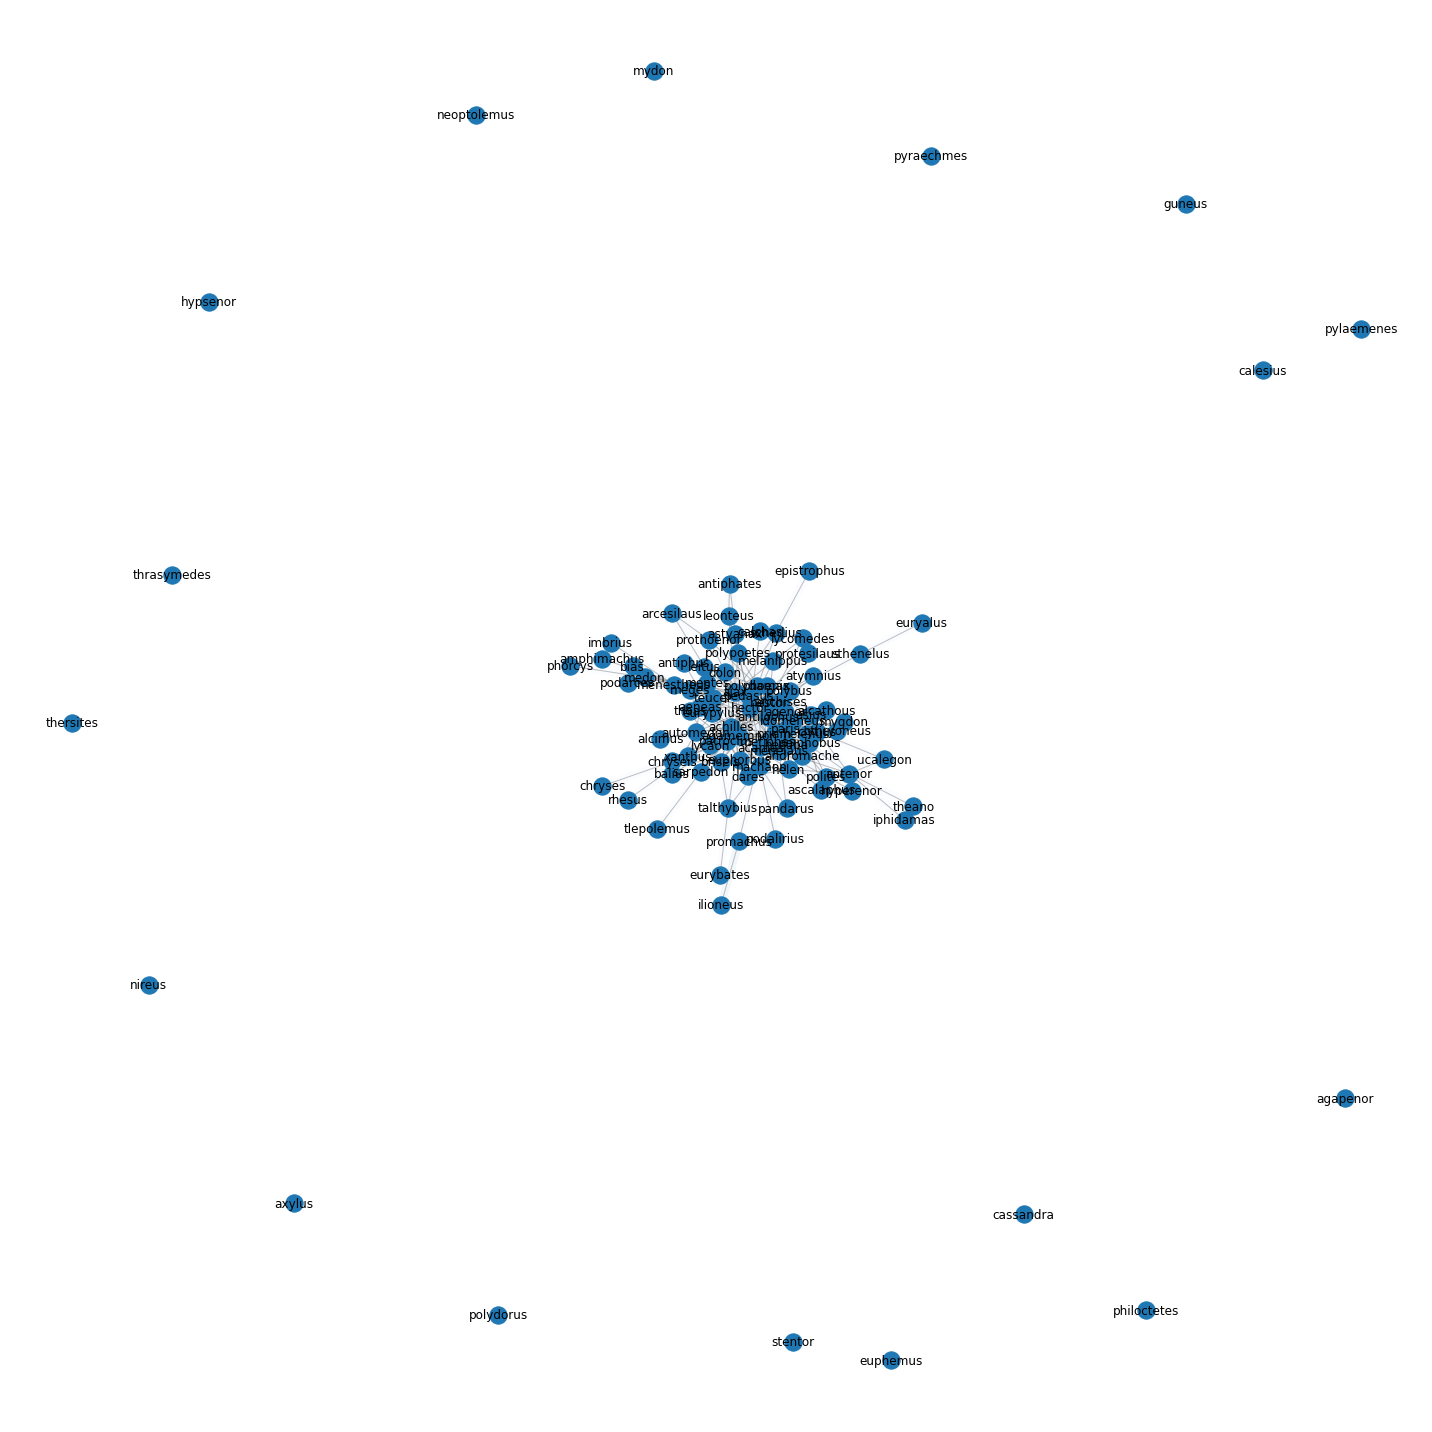

In [35]:
# Count co-occurrences for characters only from https://en.wikipedia.org/wiki/Template:Characters_in_the_Iliad
achaeans = [ 'acamas', 'achilles', 'agamemnon', 'agapenor', 'ajax','alcimus','anticlus', 'antilochus', 'arcesilaus', 'ascalaphus', 'automedon', 
              'balius', 'xanthus', 'bias', 'calchas', 'diomedes', 'elephenor', 'epeius', 'eudoros', 'euryalus', 'eurybates','eurydamas', 'eurypylus', 'guneus', 'helen', 
              'ialmenus', 'idomeneus', 'leitus', 'leonteus', 'lycomedes', 'machaon', 'medon', 'meges', 'menelaus', 'menestheus', 'meriones', 'neoptolemus','nestor', 'nireus', 
              'odysseus', 'palamedes', 'patroclus', 'peneleos', 'philoctetes', 'phoenix', 'podalirius', 'podarces', 'polites', 'polypoetes', 'promachus', 'protesilaus', 
              'prothoenor', 'schedius', 'stentor', 'sthenelus', 'talthybius', 'teucer', 'thersites', 'thoas', 'thrasymedes', 'tlepolemus']

trojans = [ 'aeneas', 'aesepus', 'agenor', 'alcathous', 'amphimachus', 'anchises','andromache', 'antenor', 'antiphates', 'antiphus', 'archelochus', 'asius', 'asteropaios', 'astyanax', 'atymnius', 'axylus',
              'briseis', 'calesius', 'caletor', 'cassandra', 'chryseis', 'chryses', 'clytius', 'coön', 'dares', 'phrygius', 'deiphobus', 'dolon', 'epistrophus', 'euphemus', 
              'euphorbus', 'elaucus', 'gorgythion', 'hector', 'hecuba', 'helenus', 'hyperenor', 'hypsenor', 'ilioneus', 'imbrius', 'iphidamas', 'kebriones', 'laocoön', 'lycaon',
              'melanippus', 'mentes', 'mydon', 'mygdon', 'othryoneus', 'pandarus', 'panthous', 'paris', 'pedasus', 'peirous','phorcys', 'polites', 'polydamas', 'polybus', 'polydorus',
              'priam', 'pylaemenes', 'pylaeus', 'pyraechmes', 'rhesus', 'sarpedon', 'theano', 'ucalegon']

characters = achaeans + trojans

G_focus = G.subgraph(characters)
# Create list of edge counts
counts = [G_focus.edges[e]['count'] for e in G_focus.edges]

# Create spring layout
pos = nx.spring_layout(G_focus)

# Create figure and draw nodes
plt.figure()
nx.draw_networkx_nodes(G_focus, pos)
# Draw edges
nx.draw_networkx_edges(
    G_focus, pos, width=8,
    edge_color=counts, edge_cmap=plt.cm.Blues, alpha=0.5)
nx.draw_networkx_edges(G_focus, pos, edge_color="#7f7f7f",alpha=0.5)
# Draw labels
nx.draw_networkx_labels(G_focus, pos)
plt.tight_layout()